# Comparing Test Results

This notebook compares the performance of the Base vs DDDA model

## Imports

In [22]:
import pickle 
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow import keras
import seaborn as sns 
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,
                             f1_score,recall_score,precision_score, roc_auc_score, roc_curve)

#from local package 
from modules.data_preprocessing import AudioDataGenerator

## Constants

In [5]:
TARGET_WORD='marvin'
BACKGROUND_WORD="background"
SEED= 32423453
SPEECH_DATA='audio_data'
BATCH_SIZE=32
VAL_BATCH_SIZE=8
IMG_WIDTH=43
IMG_HEIGHT=99
NOISE_FLOOR=0.1

keras.utils.set_random_seed(SEED)

## Loading files

In [6]:
def list_subfolders(folder_path):
    subfolders = [f.path[len(folder_path)+1:] for f in os.scandir(folder_path) if f.is_dir()]
    return subfolders

words = list_subfolders(SPEECH_DATA)
classes=[word for word in words if "_" not in word]

with open('data/dict_split.pkl', 'rb') as handle:
    split_data = pickle.load(handle)

#loading models
with open("data/model5history.pkl", 'rb') as handle:
    augment_model_history = pickle.load(handle)

with open("data/model8history.pkl", 'rb') as handle:
    model_history = pickle.load(handle)

## Comparing training set performance

Note: Due to differences in the data used for training a direct comparison can not be made with training results

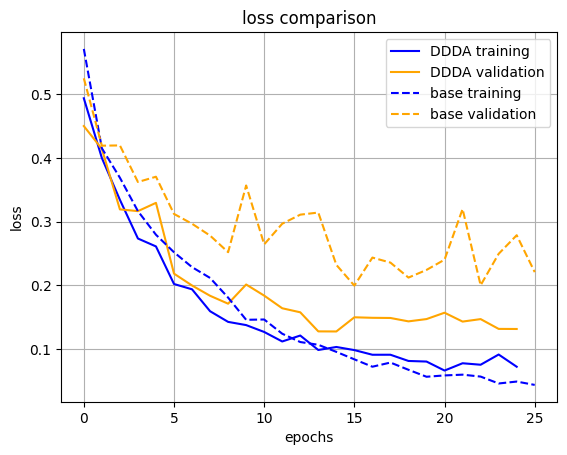

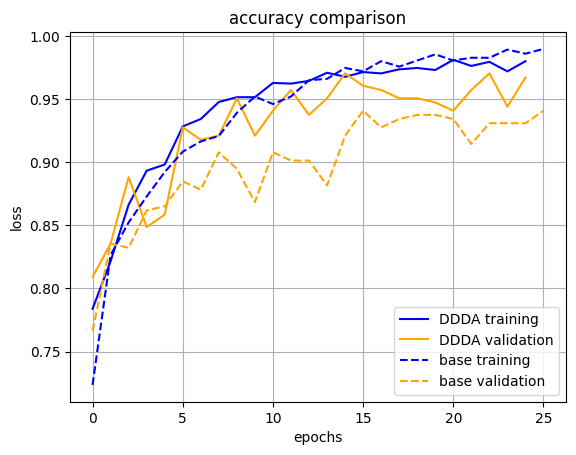

In [7]:
metrics=augment_model_history
plt.plot(metrics['loss'],label='DDDA training',color='blue')
plt.plot(metrics['val_loss'],label='DDDA validation',color='orange')
metrics=model_history
plt.plot(metrics['loss'],label='base training',color='blue',ls='--')
plt.plot(metrics['val_loss'],label='base validation',color='orange',ls='--')
plt.legend()
plt.title('loss comparison')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

metrics=augment_model_history
plt.plot(metrics['accuracy'],label='DDDA training',color='blue')
plt.plot(metrics['val_accuracy'],label='DDDA validation',color='orange')
metrics=model_history
plt.plot(metrics['accuracy'],label='base training',color='blue',ls='--')
plt.plot(metrics['val_accuracy'],label='base validation',color='orange',ls='--')
plt.legend()
plt.title('accuracy comparison')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## Comparing testing set performance

In [8]:
datagen_test=AudioDataGenerator(filenames=split_data['test'],
                                classes=classes,
                                data_folder=SPEECH_DATA,
                                noise_floor=NOISE_FLOOR,
                                target=TARGET_WORD,
                                batch_size=311,
                                training=False,
                                augment=True)

X,y=datagen_test.__getitem__(0)

thresh=0.5

model_loaded=keras.models.load_model('models/model_training8.keras')
pred=model_loaded.predict(x=X)
metrics_05=[accuracy_score(y,pred>thresh),recall_score(y,pred>thresh),precision_score(y,pred>thresh),f1_score(y,pred>thresh)]

model_loaded=keras.models.load_model('models/model_training5.keras')
pred=model_loaded.predict(x=X)
metrics_aug_05=[accuracy_score(y,pred>thresh),recall_score(y,pred>thresh),precision_score(y,pred>thresh),f1_score(y,pred>thresh)]

10/10 [==============================] - 0s 12ms/step


### Threshold of 0.5

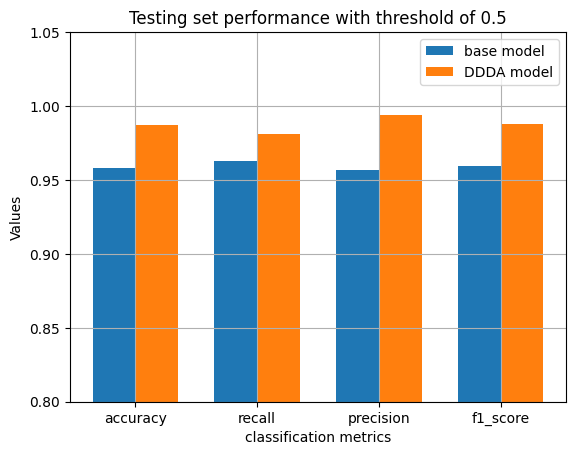

In [9]:
# Data
categories = ['accuracy', 'recall', 'precision', 'f1_score']
values1 = metrics_05  # Values for the first set of bars
values2 = metrics_aug_05  # Values for the second set of bars

# Plot
fig, ax = plt.subplots()

# Width of each bar
bar_width = 0.35

# Position of bars on x-axis
x = range(len(categories))

# Plotting bars
bar1 = ax.bar(x, values1, width=bar_width, label='base model')
bar2 = ax.bar([i + bar_width for i in x], values2, width=bar_width, label='DDDA model')

# Adding labels, title, and legend
ax.set_xlabel('classification metrics')
ax.set_ylabel('Values')
ax.set_title('Testing set performance with threshold of 0.5')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0.8,1.05)
plt.grid()

# Show plot
plt.show()

### Threshold of 0.9

In [10]:
thresh=0.9

model_loaded=keras.models.load_model('models/model_training8.keras')
pred=model_loaded.predict(x=X)
metrics_09=[accuracy_score(y,pred>thresh),recall_score(y,pred>thresh),precision_score(y,pred>thresh),f1_score(y,pred>thresh)]

model_loaded=keras.models.load_model('models/model_training5.keras')
pred_aug=model_loaded.predict(x=X)
metrics_aug_09=[accuracy_score(y,pred_aug>thresh),recall_score(y,pred_aug>thresh),precision_score(y,pred_aug>thresh),f1_score(y,pred_aug>thresh)]

10/10 [==============================] - 0s 19ms/step


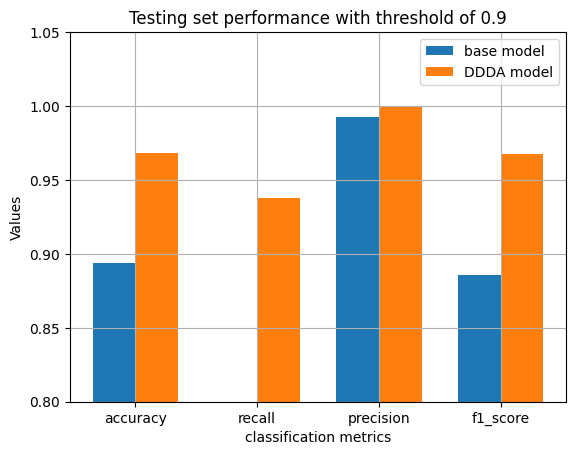

In [11]:
# Data
categories = ['accuracy', 'recall', 'precision', 'f1_score']
values1 = metrics_09  # Values for the first set of bars
values2 = metrics_aug_09  # Values for the second set of bars

# Plot
fig, ax = plt.subplots()

# Width of each bar
bar_width = 0.35

# Position of bars on x-axis
x = range(len(categories))

# Plotting bars
bar1 = ax.bar(x, values1, width=bar_width, label='base model')
bar2 = ax.bar([i + bar_width for i in x], values2, width=bar_width, label='DDDA model')

# Adding labels, title, and legend
ax.set_xlabel('classification metrics')
ax.set_ylabel('Values')
ax.set_title('Testing set performance with threshold of 0.9')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0.8,1.05)
plt.grid()

# Show plot
plt.show()

Text(0.5, 1.0, 'Testing Set Confusion Matrix with Base Model Threshold 0.9')

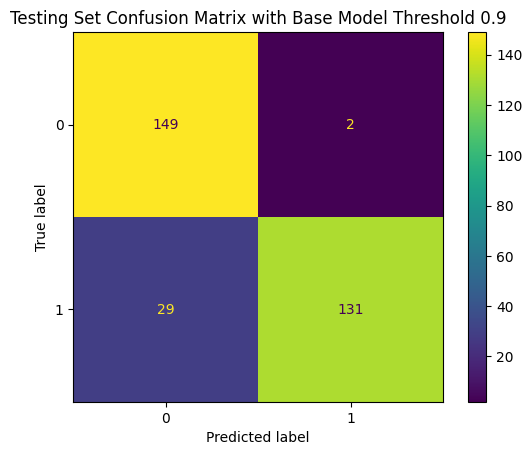

In [161]:
ConfusionMatrixDisplay.from_predictions(y,pred>0.9)
plt.title('Testing Set Confusion Matrix with Base Model Threshold 0.9')

Text(0.5, 1.0, 'Testing Set Confusion Matrix with DDDA Model Threshold 0.9')

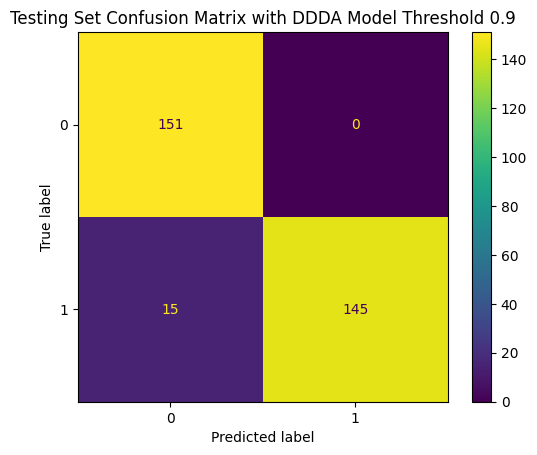

In [162]:
ConfusionMatrixDisplay.from_predictions(y,pred_aug>0.9)
plt.title('Testing Set Confusion Matrix with DDDA Model Threshold 0.9')

### ROC curves

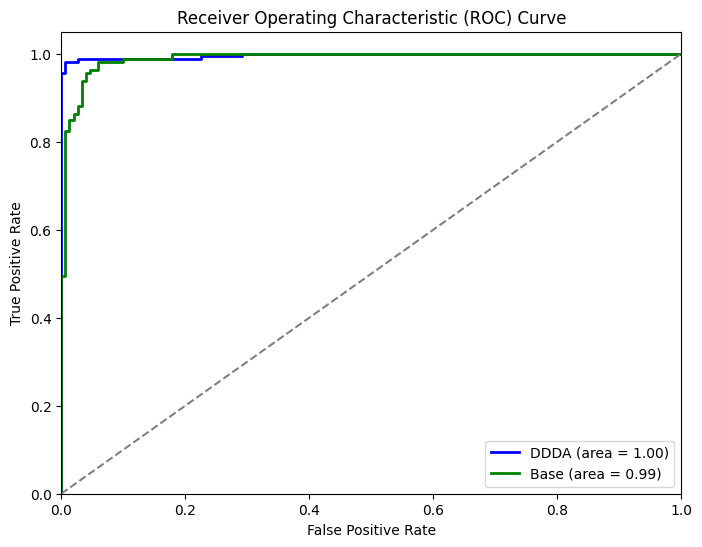

In [18]:
# Plot ROC curve
plt.figure(figsize=(8, 6))

fpr, tpr, thresholds = roc_curve(y, pred_aug)
auc = roc_auc_score(y, pred_aug)
plt.plot(fpr, tpr, color='blue', lw=2, label='DDDA (area = %0.2f)' % auc)

fpr, tpr, thresholds = roc_curve(y, pred)
auc = roc_auc_score(y, pred)
plt.plot(fpr, tpr, color='green', lw=2, label='Base (area = %0.2f)' % auc)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()